In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w
w.filterwarnings("ignore")
from scipy.stats import skew

In [2]:
df=pd.read_csv("seeds.csv")
df

,V1,V2,V3,V4,V5,V6,V7,Y
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [3]:
df.drop(["Y"],axis=1,inplace=True)

In [4]:
df

,V1,V2,V3,V4,V5,V6,V7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


# clustring  

In [5]:
x=df.iloc[:,0:]

In [6]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [7]:
from sklearn.cluster import KMeans

In [8]:
wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i, random_state=1)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [9]:
wcss

[1470.0,
 659.1717544870407,
 430.6589731513006,
 371.5811909715524,
 326.2289168297265,
 288.95334686682867,
 262.790604999662,
 242.3309136566555,
 221.19069263168066,
 207.42861036010646]

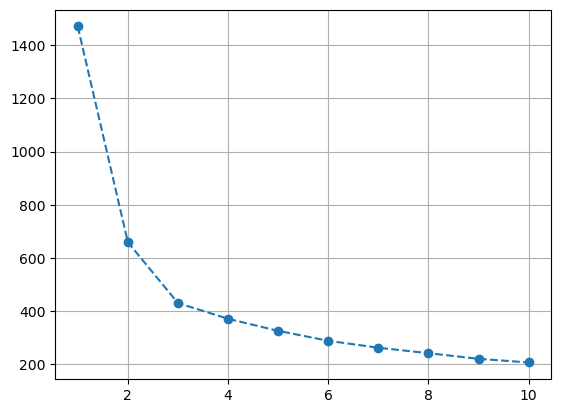

In [10]:
plt.plot(range(1,11),wcss,"o--")
plt.grid();

In [11]:
kmeans=KMeans(n_clusters=5,random_state=1)
Ykmeans=kmeans.fit_predict(x)

In [12]:
df["Y"]=Ykmeans

In [13]:
df

,V1,V2,V3,V4,V5,V6,V7,Y
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,2
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,2
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,2
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,2
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,2
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,1
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,4
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,1
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,4


In [14]:
df.isnull().sum()

V1    0
V2    0
V3    0
V4    0
V5    0
V6    0
V7    0
Y     0
dtype: int64

# CHECKING FOR OUTLIERS

<AxesSubplot:>

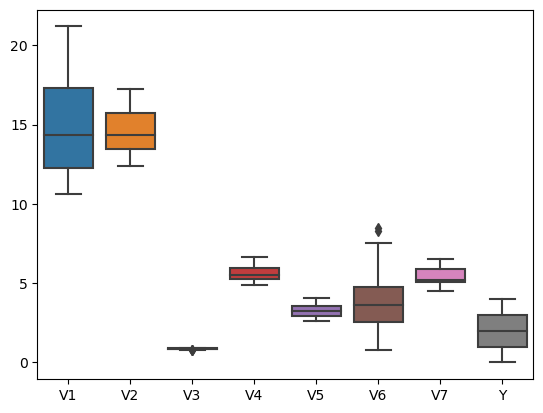

In [15]:
sns.boxplot(data=df)

# REMOVING OF OUTLIERS

In [16]:
Q1=np.quantile(df["V6"],0.25)
Q3=np.quantile(df["V6"],0.75)
IQR=Q3-Q1
uw=Q3+1.5*IQR
lw=Q1-1.5*IQR
index=df["V6"][(df["V6"]>uw)|(df["V6"]<lw)].index
df.drop(index,inplace=True)

<AxesSubplot:>

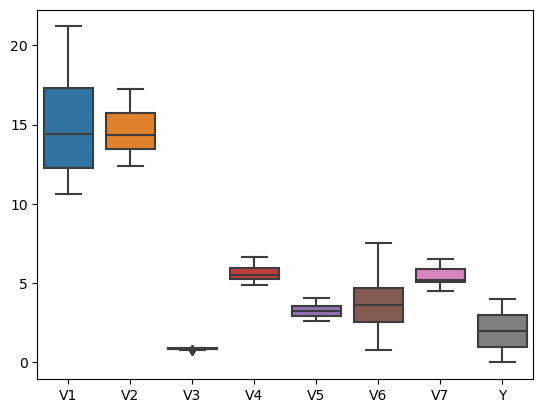

In [17]:
sns.boxplot(data=df)

In [18]:
x=df.iloc[:,0:-1]
x

,V1,V2,V3,V4,V5,V6,V7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
204,12.37,13.47,0.8567,5.204,2.960,3.919,5.001
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


# SCALING

In [19]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [20]:
y=df["Y"]

In [21]:
df["V1"].skew()

0.3843967468995678

In [22]:
df["V1"]=np.log(df["V1"])
df["V1"].skew()

0.1664865096867735

In [23]:
df["V2"].skew()

0.37034831388112516

In [24]:
df["V2"]=np.sqrt(df["V2"])
df["V2"].skew()

0.3205350885192286

In [25]:
#df["V3"]=np.sqrt(df["V2"])
df["V3"].skew()

-0.522194576356937

# TRAINING AND TESTING THE DATA

In [26]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

# DecisionTreeClassifier

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
parameter={
         "criterion":["gini","entropy"],
         "max_depth":list(range(1,20)),
         "min_samples_leaf":list(range(1,20))
         }

In [31]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(DecisionTreeClassifier(), parameter, verbose=2)
grid.fit(xtrain,ytrain)
ypred=grid.predict(xtest)

Fitting 5 folds for each of 722 candidates, totalling 3610 fits
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min

In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
a_s=accuracy_score(ytest,ypred)
c_m=confusion_matrix(ytest,ypred)
c_r=classification_report(ytest,ypred)
print(f"Accuracy :{a_s}\n{c_m}\n\n{c_r}")

Accuracy :0.8253968253968254
[[ 3  0  2  1  0]
 [ 0 10  2  0  0]
 [ 1  2 17  0  2]
 [ 0  0  0 12  0]
 [ 0  1  0  0 10]]

              precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.77      0.83      0.80        12
           2       0.81      0.77      0.79        22
           3       0.92      1.00      0.96        12
           4       0.83      0.91      0.87        11

    accuracy                           0.83        63
   macro avg       0.82      0.80      0.80        63
weighted avg       0.82      0.83      0.82        63



In [39]:
print(grid.score(xtrain,ytrain))
print(grid.score(xtest,ytest))


1.0
0.8253968253968254
